# LOADING DATA

In [1]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('/content/election_results_2024.csv')

# DATA EXPLORATION

In [2]:
# 1. Basic information
print("Basic Information")
print(df.info())

Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB
None


In [3]:
# 2. Check for missing values
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64


In [4]:
# 3. Check for duplicate entries
print("\nDuplicate Entries")
print(df.duplicated().sum())


Duplicate Entries
0


In [5]:
# 4. Check data types of columns
print("\nData Types")
print(df.dtypes)


Data Types
Constituency          object
Const. No.             int64
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                object
Status                object
dtype: object


In [6]:
# 5. Display the basic statistics of the dataset.
basic_statistics = df.describe(include='all')
print("Basic Statistics:\n", basic_statistics)

Basic Statistics:
        Constituency  Const. No. Leading Candidate           Leading Party  \
count           543  543.000000               543                     543   
unique          541         NaN               542                      42   
top     Maharajganj         NaN      RAHUL GANDHI  Bharatiya Janata Party   
freq              2         NaN                 2                     240   
mean            NaN   18.178637               NaN                     NaN   
std             NaN   16.427840               NaN                     NaN   
min             NaN    1.000000               NaN                     NaN   
25%             NaN    6.000000               NaN                     NaN   
50%             NaN   14.000000               NaN                     NaN   
75%             NaN   25.000000               NaN                     NaN   
max             NaN   80.000000               NaN                     NaN   

          Trailing Candidate            Trailing Party  

# DATA HANDLING

In [7]:
# Delete rows with missing values
df.dropna(inplace=True)

In [8]:
# Verify that missing values are deleted
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

In [9]:
# Convert 'Margin' column to integer type
df['Margin'] = df['Margin'].astype(int)


In [10]:
# Verify the conversion
print("\nData types after conversion:\n", df.dtypes)


Data types after conversion:
 Constituency          object
Const. No.             int64
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                 int64
Status                object
dtype: object


# DATA ANALYSIS

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 1. Count the number of unique constituencies.
unique_constituencies = df['Constituency'].nunique()
print("\nNumber of Unique Constituencies:", unique_constituencies)


Number of Unique Constituencies: 540


In [13]:
# 2. List all unique parties in the dataset.
unique_parties = pd.concat([df['Leading Party'], df['Trailing Party']]).unique()
print("\nUnique Parties:\n", unique_parties)


Unique Parties:
 ['Bharatiya Janata Party' 'Indian National Congress'
 'Jammu & Kashmir National Conference' 'Dravida Munnetra Kazhagam'
 'Nationalist Congress Party – Sharadchandra Pawar'
 'Communist Party of India (Marxist)' 'Telugu Desam' 'Samajwadi Party'
 'Aam Aadmi Party' 'Yuvajana Sramika Rythu Congress Party'
 'All India Trinamool Congress'
 'Communist Party of India (Marxist-Leninist) (Liberation)' 'Shiv Sena'
 'Rashtriya Janata Dal' 'Bharat Adivasi Party' 'Independent'
 'Rashtriya Lok Dal' 'Janata Dal (United)' 'Asom Gana Parishad'
 'Shiromani Akali Dal' 'Viduthalai Chiruthaigal Katch'
 'Jharkhand Mukti Morcha' 'Hindustani Awam Morcha (Secular)' 'AJSU Party'
 'Lok Janshakti Party(Ram Vilas)' 'Shiv Sena (Uddhav Balasaheb Thackrey)'
 'All India Majlis-E-Ittehadul Muslimeen' 'Janasena Party'
 'United People’s Party, Liberal' 'Janata Dal (Secular)'
 'Revolutionary Socialist Party' 'Kerala Congress'
 'Zoram People’s Movement' 'Indian Union Muslim League'
 'Apna Dal (Soneylal)' 'C


Leading Party Counts:
 Leading Party
Bharatiya Janata Party                                      239
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
In

<ipython-input-14-b8d7d4325a85>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leading_party_counts.values, y=leading_party_counts.index, palette='viridis')


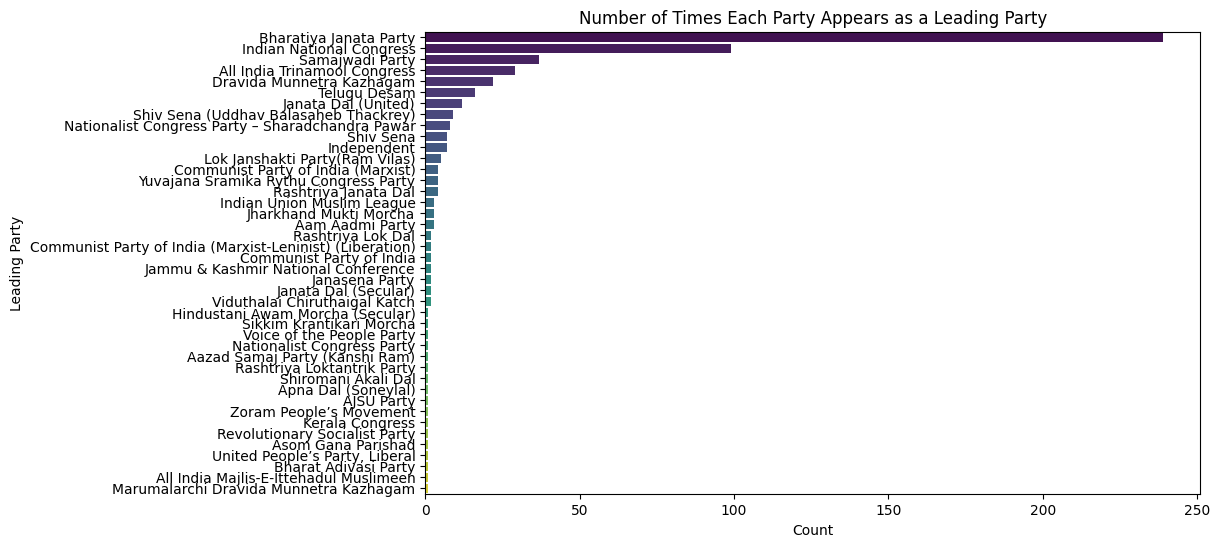

In [14]:
# 3. Count the number of times each party appears as a leading party.
leading_party_counts = df['Leading Party'].value_counts()
print("\nLeading Party Counts:\n", leading_party_counts)

# Plot for leading party counts
plt.figure(figsize=(10, 6))
sns.barplot(x=leading_party_counts.values, y=leading_party_counts.index, palette='viridis')
plt.title('Number of Times Each Party Appears as a Leading Party')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()


Trailing Party Counts:
 Trailing Party
Indian National Congress                                    167
Bharatiya Janata Party                                      153
All India Anna Dravida Munnetra Kazhagam                     24
Samajwadi Party                                              24
Biju Janata Dal                                              21
Yuvajana Sramika Rythu Congress Party                        21
Rashtriya Janata Dal                                         18
Communist Party of India (Marxist)                           17
All India Trinamool Congress                                 13
Aam Aadmi Party                                              13
Shiv Sena (Uddhav Balasaheb Thackrey)                        10
Shiv Sena                                                     8
Independent                                                   5
Communist Party of India                                      4
Janata Dal (United)                                           4


<ipython-input-15-1672482acf36>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_counts.values, y=trailing_party_counts.index, palette='magma')


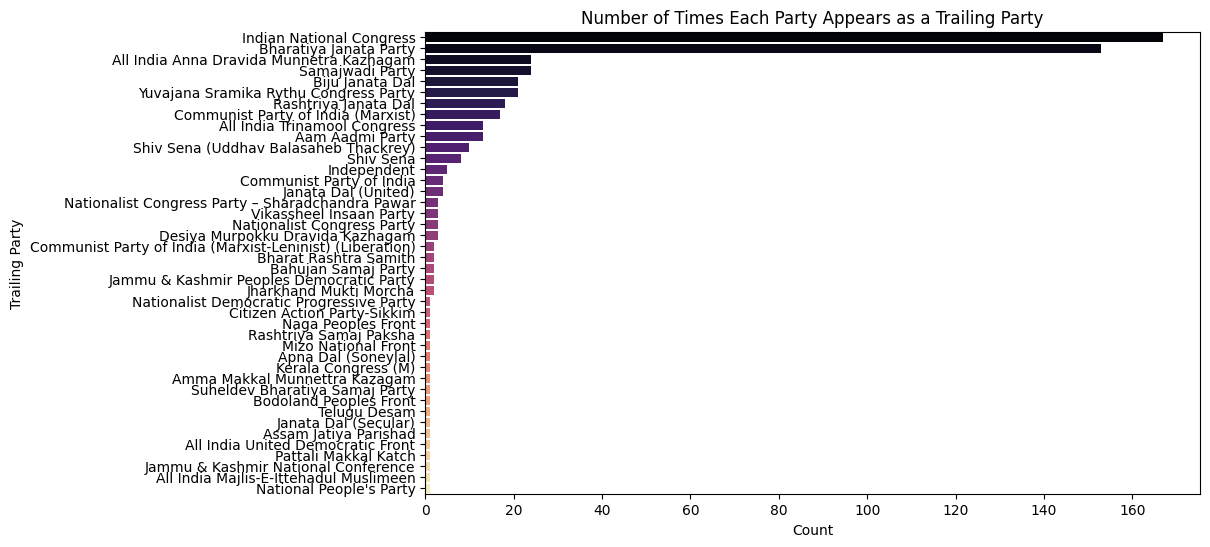

In [15]:
# 4. Count the number of times each party appears as a trailing party.
trailing_party_counts = df['Trailing Party'].value_counts()
print("\nTrailing Party Counts:\n", trailing_party_counts)

# Plot for trailing party counts
plt.figure(figsize=(10, 6))
sns.barplot(x=trailing_party_counts.values, y=trailing_party_counts.index, palette='magma')
plt.title('Number of Times Each Party Appears as a Trailing Party')
plt.xlabel('Count')
plt.ylabel('Trailing Party')
plt.show()

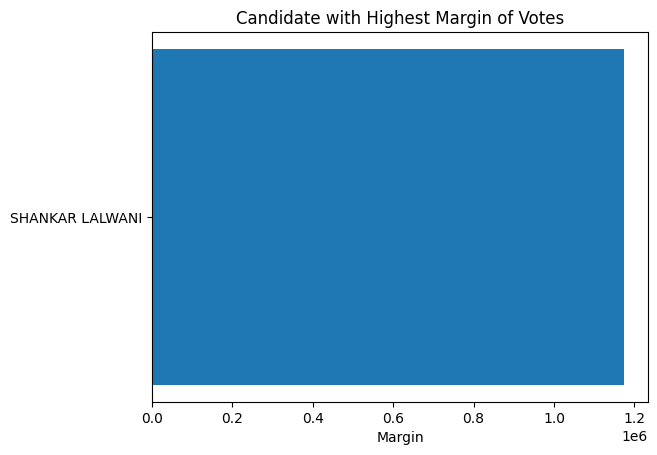

In [16]:
# 5. Which candidate received the highest margin of votes?

highest_margin_candidate = df.loc[df['Margin'].idxmax()]
plt.barh(highest_margin_candidate['Leading Candidate'], highest_margin_candidate['Margin'])
plt.xlabel('Margin')
plt.title('Candidate with Highest Margin of Votes')
plt.show()

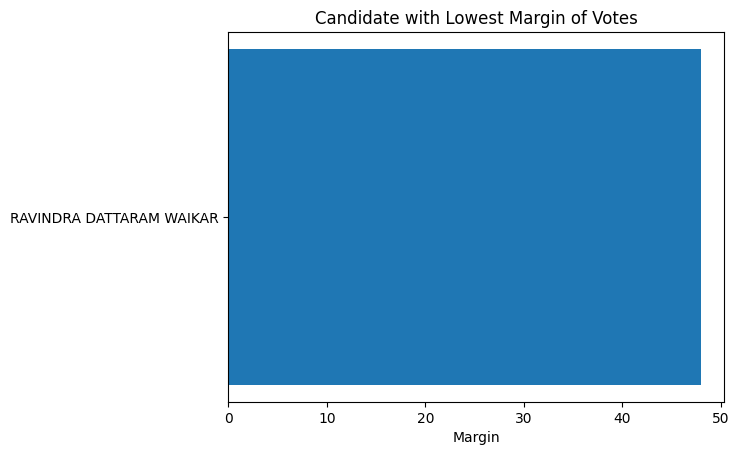

In [17]:
# 6. Which candidate received the lowest margin of votes?
lowest_margin_candidate = df.loc[df['Margin'].idxmin()]
plt.barh(lowest_margin_candidate['Leading Candidate'], lowest_margin_candidate['Margin'])
plt.xlabel('Margin')
plt.title('Candidate with Lowest Margin of Votes')
plt.show()

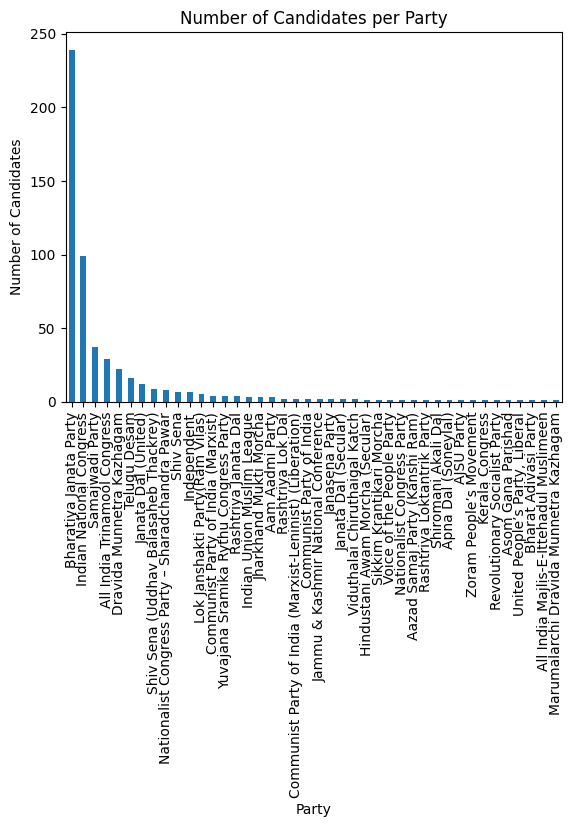

In [18]:
# 7. How many candidates from each party contested the election?
candidates_per_party = df['Leading Party'].value_counts()
candidates_per_party.plot(kind='bar', title='Number of Candidates per Party')
plt.ylabel('Number of Candidates')
plt.xlabel('Party')
plt.show()

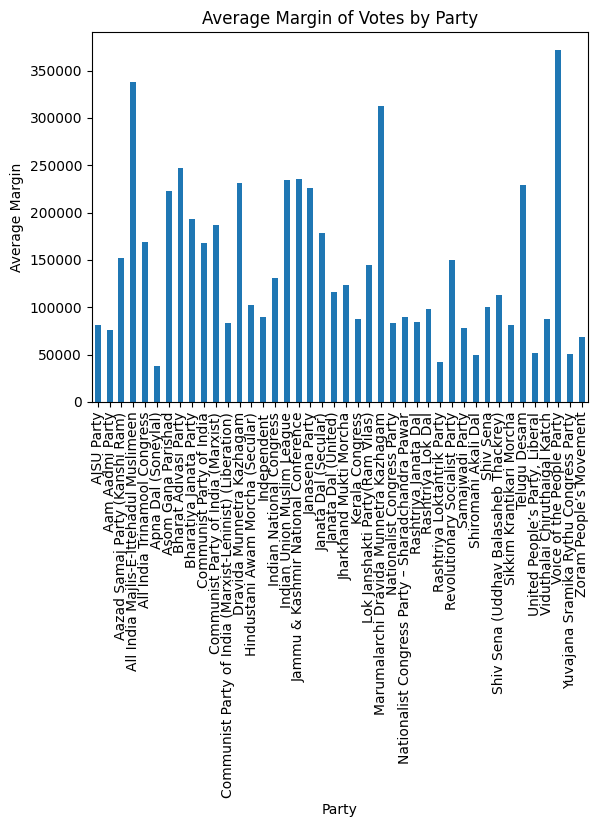

In [19]:
# 8. What is the average margin of votes by party?
average_margin_by_party = df.groupby('Leading Party')['Margin'].mean()
average_margin_by_party.plot(kind='bar', title='Average Margin of Votes by Party')
plt.ylabel('Average Margin')
plt.xlabel('Party')
plt.show()

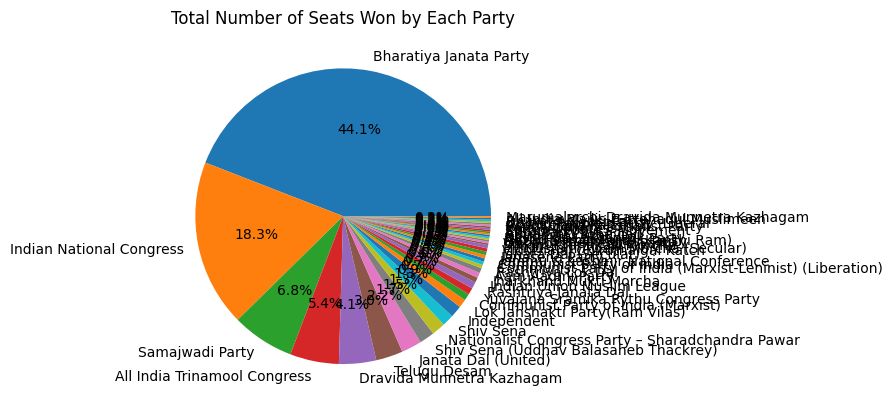

In [20]:
# 9. What is the total number of seats won by each party?
seats_per_party = df['Leading Party'].value_counts()
seats_per_party.plot(kind='pie', autopct='%1.1f%%', title='Total Number of Seats Won by Each Party')
plt.ylabel('')
plt.show()


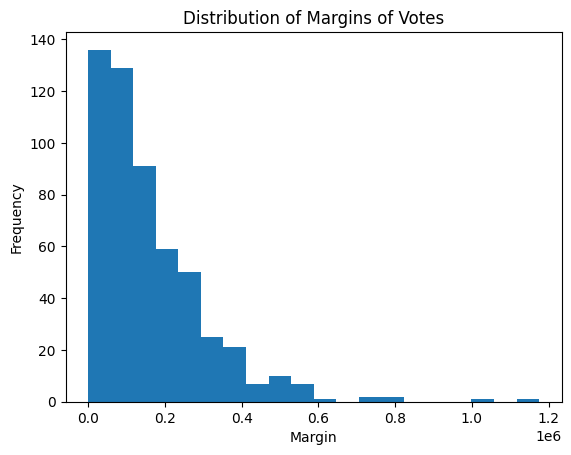

In [21]:
# 10. What is the distribution of margins of votes?
df['Margin'].plot(kind='hist', bins=20, title='Distribution of Margins of Votes')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()


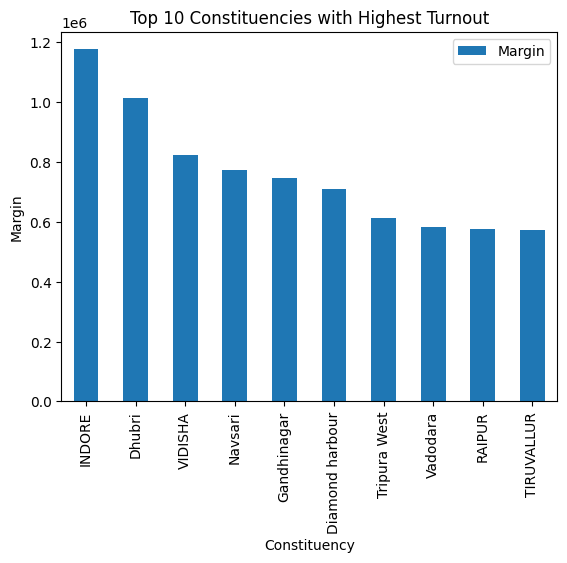

In [22]:
# 11. Which constituencies had the highest voter turnout?
highest_turnout_constituencies = df.nlargest(10, 'Margin')
highest_turnout_constituencies.plot(kind='bar', x='Constituency', y='Margin', title='Top 10 Constituencies with Highest Turnout')
plt.ylabel('Margin')
plt.show()


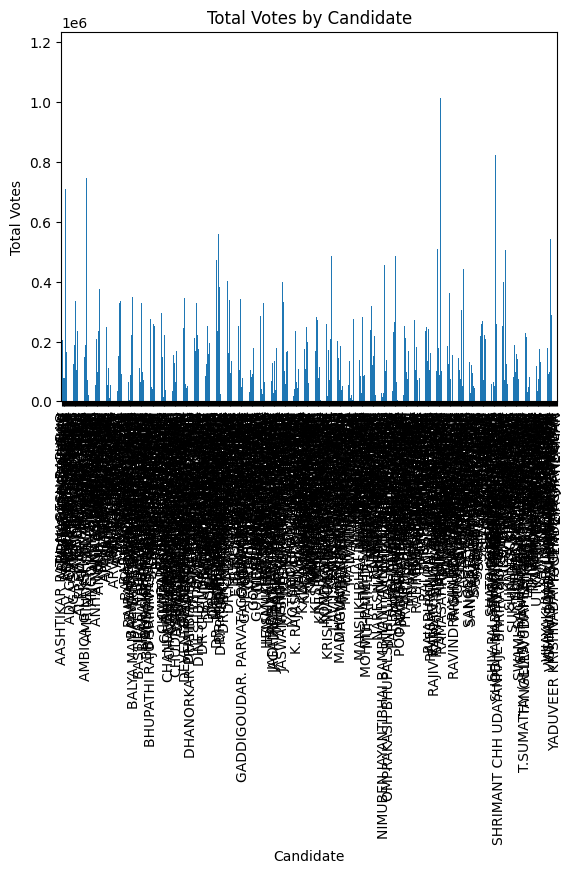

In [23]:
# 12. What is the total number of votes received by each candidate?

total_votes_by_candidate = df.groupby('Leading Candidate')['Margin'].sum()
total_votes_by_candidate.plot(kind='bar', title='Total Votes by Candidate')
plt.ylabel('Total Votes')
plt.xlabel('Candidate')
plt.show()

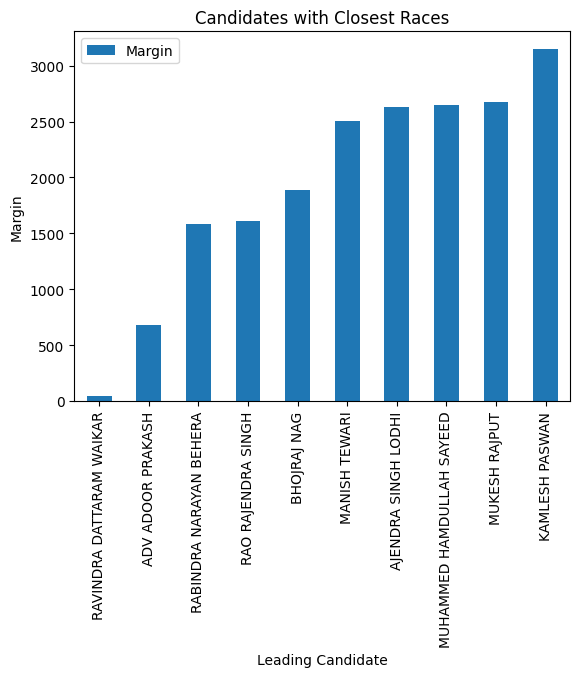

In [24]:
# 13. Which candidates had the closest races?
closest_races = df.nsmallest(10, 'Margin')
closest_races.plot(kind='bar', x='Leading Candidate', y='Margin', title='Candidates with Closest Races')
plt.ylabel('Margin')
plt.show()


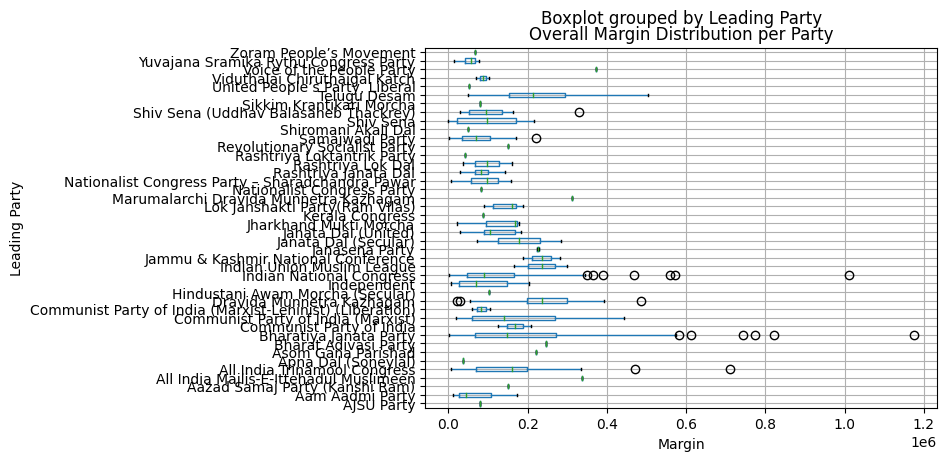

In [25]:
# 14. What is the overall margin distribution per party?
df.boxplot(column='Margin', by='Leading Party', vert=False)
plt.title('Overall Margin Distribution per Party')
plt.xlabel('Margin')
plt.show()


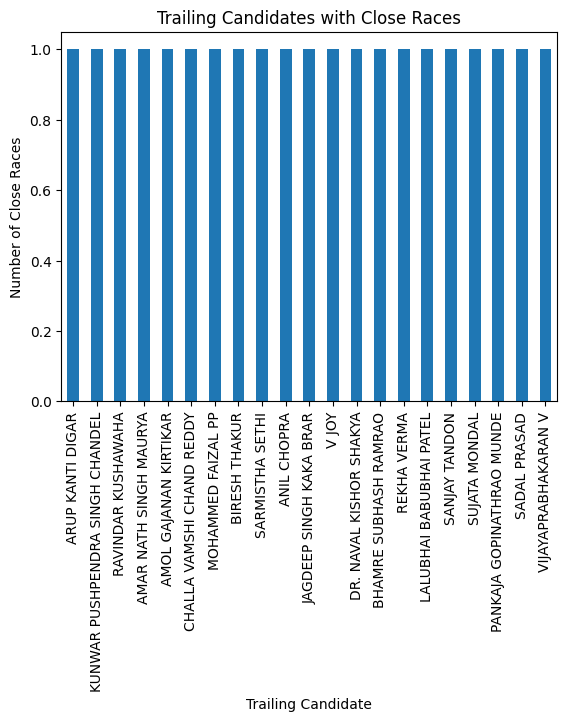

In [26]:
# 15. Which trailing candidate had the highest number of close races?

df['Close Race'] = df['Margin'] < 10000
trailing_candidates_close_races = df[df['Close Race']]['Trailing Candidate'].value_counts()
trailing_candidates_close_races.plot(kind='bar', title='Trailing Candidates with Close Races')
plt.ylabel('Number of Close Races')
plt.xlabel('Trailing Candidate')
plt.show()


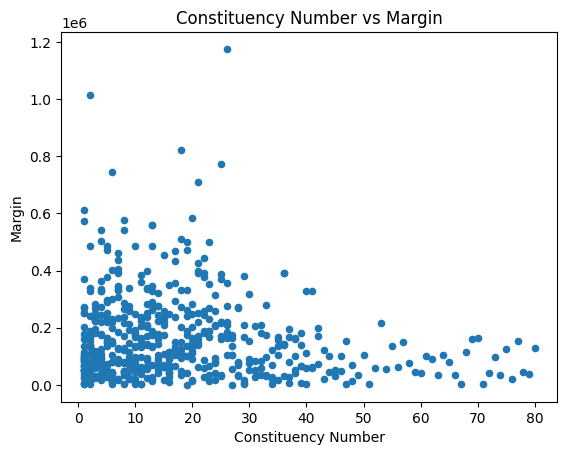

In [27]:
# 16. What is the relationship between constituency number and margin?

df.plot.scatter(x='Const. No.', y='Margin', title='Constituency Number vs Margin')
plt.xlabel('Constituency Number')
plt.ylabel('Margin')
plt.show()




Constituency with Maximum Margin: INDORE


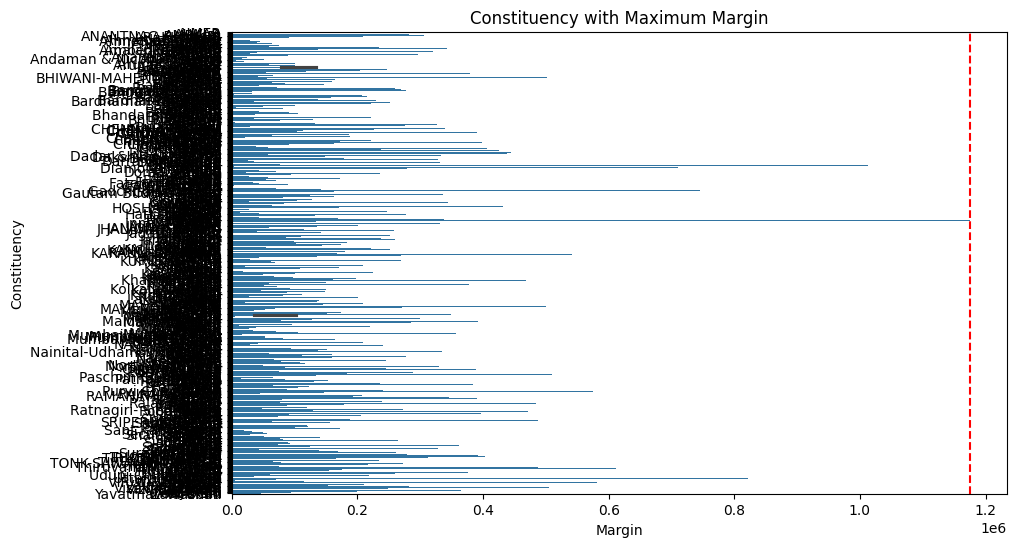

In [28]:
# 17. Find the constituency with the maximum margin.
max_margin_constituency = df[df['Margin'] == df['Margin'].max()]['Constituency'].values[0]
print("\nConstituency with Maximum Margin:", max_margin_constituency)

# Plot for constituency with maximum margin
max_margin = df['Margin'].max()
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Margin'], y=df['Constituency'])
plt.axvline(x=max_margin, color='red', linestyle='--')
plt.title('Constituency with Maximum Margin')
plt.xlabel('Margin')
plt.ylabel('Constituency')
plt.show()


Constituency with Minimum Margin: Mumbai North West


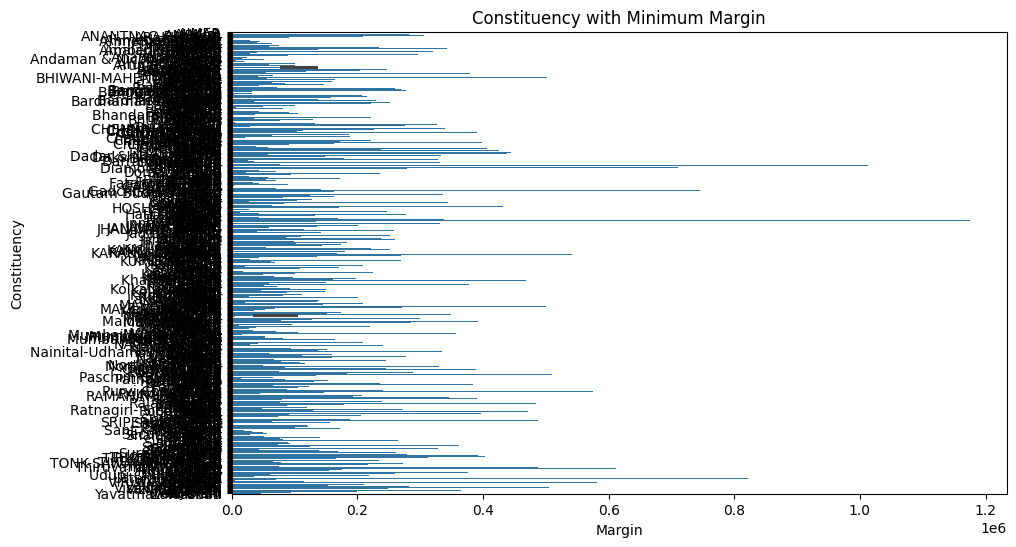

In [29]:
# 18. Find the constituency with the minimum margin.
min_margin_constituency = df[df['Margin'] == df['Margin'].min()]['Constituency'].values[0]
print("\nConstituency with Minimum Margin:", min_margin_constituency)

# Plot for constituency with minimum margin
min_margin = df['Margin'].min()
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Margin'], y=df['Constituency'])
plt.axvline(x=min_margin, color='green', linestyle='--')
plt.title('Constituency with Minimum Margin')
plt.xlabel('Margin')
plt.ylabel('Constituency')
plt.show()

In [30]:
# 19. Count the number of results declared and other status values.
status_counts = df['Status'].value_counts()
print("\nStatus Counts:\n", status_counts)



Status Counts:
 Status
Result Declared    542
Name: count, dtype: int64



Average Margin of Victory: 162350.08302583024


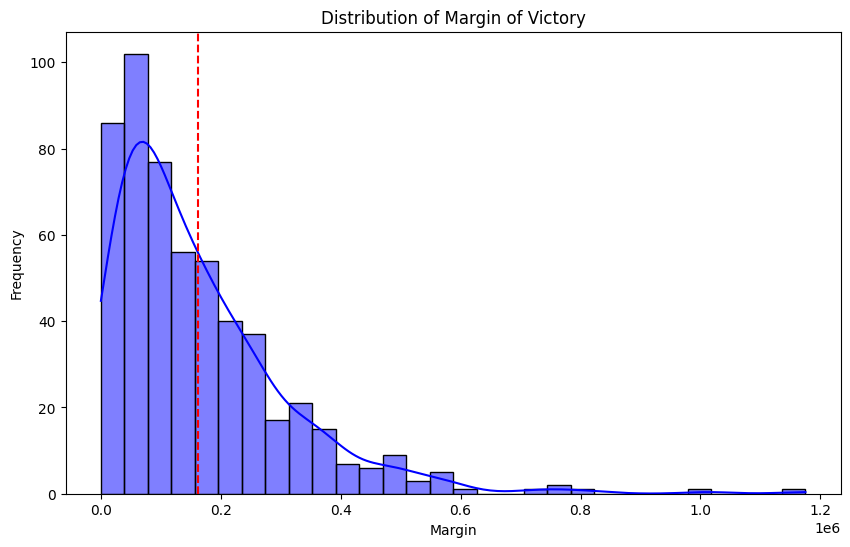

In [ ]:
# 20. Calculate the average margin of victory.
average_margin = df['Margin'].mean()
print("\nAverage Margin of Victory:", average_margin)

# Plot for average margin of victory
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde=True, color='blue')
plt.axvline(x=average_margin, color='red', linestyle='--')
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

In [31]:
# 21. What is the most common status in the dataset?
most_common_status = df['Status'].mode()[0]
print("\nMost Common Status:", most_common_status)




Most Common Status: Result Declared



Margin Distribution:
 count    5.420000e+02
mean     1.623501e+05
std      1.472628e+05
min      4.800000e+01
25%      5.895675e+04
50%      1.222660e+05
75%      2.229720e+05
max      1.175092e+06
Name: Margin, dtype: float64


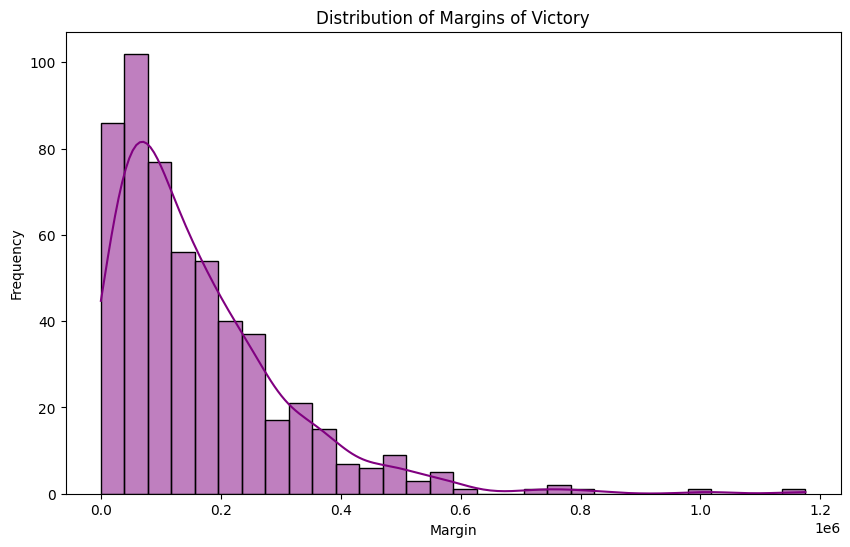

In [32]:
# 22. What is the distribution of margins of victory?
margin_distribution = df['Margin'].describe()
print("\nMargin Distribution:\n", margin_distribution)

# Plot for distribution of margins of victory
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde=True, color='purple')
plt.title('Distribution of Margins of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()


Party with Highest Average Margin of Victory: Voice of the People Party


<ipython-input-33-1c236a862044>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_margin_by_party.values, y=avg_margin_by_party.index, palette='cividis')


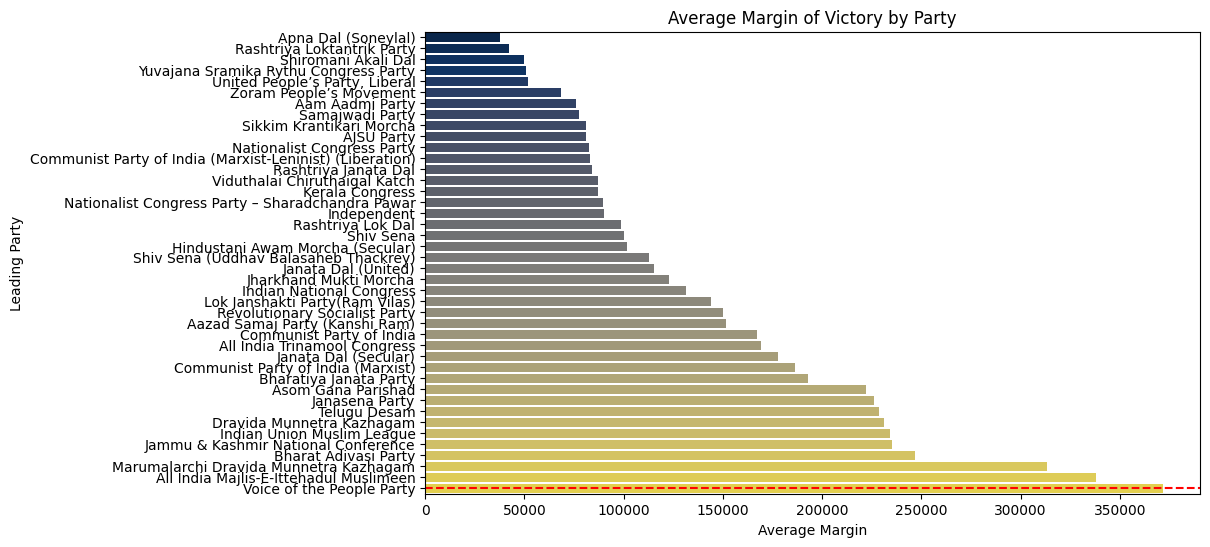

In [33]:
# 23. Which party has the highest average margin of victory?
highest_avg_margin_party = df.groupby('Leading Party')['Margin'].mean().idxmax()
print("\nParty with Highest Average Margin of Victory:", highest_avg_margin_party)

# Plot for highest average margin of victory by party
avg_margin_by_party = df.groupby('Leading Party')['Margin'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_margin_by_party.values, y=avg_margin_by_party.index, palette='cividis')
plt.title('Average Margin of Victory by Party')
plt.xlabel('Average Margin')
plt.ylabel('Leading Party')
plt.axhline(y=highest_avg_margin_party, color='red', linestyle='--')
plt.show()

In [34]:
# 24. Which party has the lowest average margin of victory?
lowest_avg_margin_party = df.groupby('Leading Party')['Margin'].mean().idxmin()
print("\nParty with Lowest Average Margin of Victory:", lowest_avg_margin_party)



Party with Lowest Average Margin of Victory: Apna Dal (Soneylal)


In [35]:
# 25. What is the total number of votes accounted for in leading margins?
total_leading_votes = df['Margin'].sum()
print("\nTotal Number of Votes Accounted for in Leading Margins:", total_leading_votes)



Total Number of Votes Accounted for in Leading Margins: 87993745



Correlation between Number of Wins and Average Margin of Victory: 0.07998602104210617


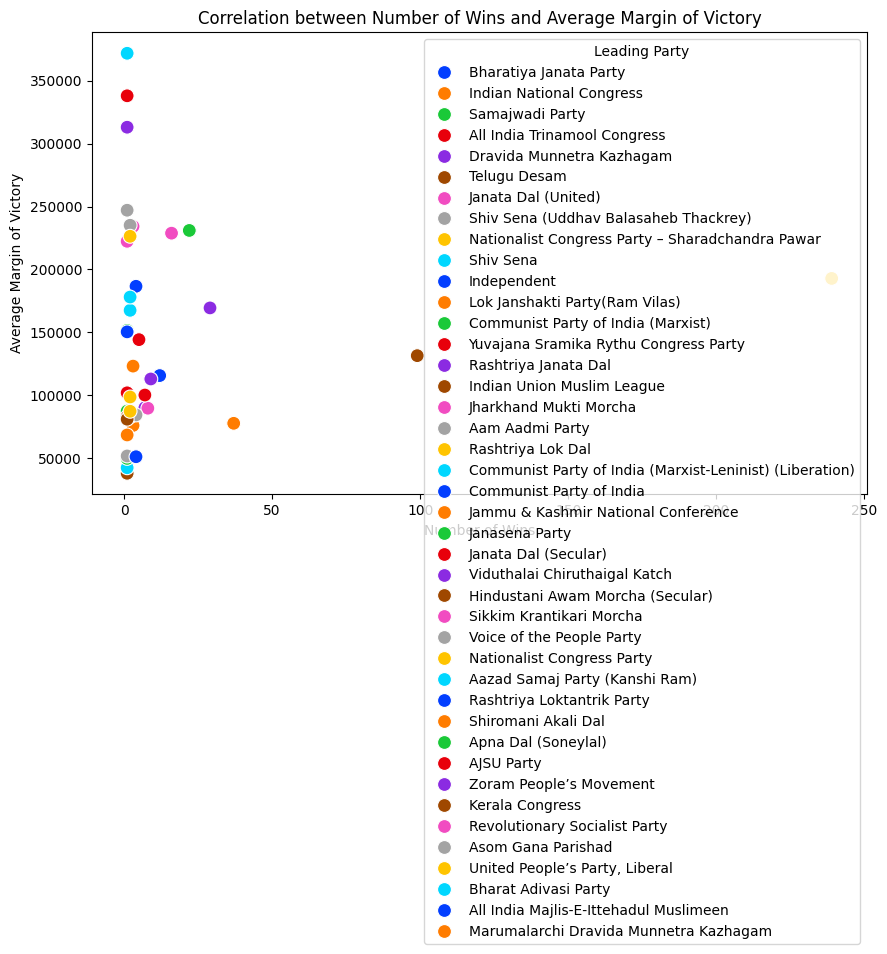

In [36]:
# 26. Is there a correlation between the number of constituencies a party wins and its average margin of victory?
party_wins_avg_margin = df.groupby('Leading Party')['Margin'].mean()
party_win_counts = df['Leading Party'].value_counts()
correlation = party_wins_avg_margin.corr(party_win_counts)
print("\nCorrelation between Number of Wins and Average Margin of Victory:", correlation)

# Plot for correlation between wins and average margin of victory
plt.figure(figsize=(10, 6))
sns.scatterplot(x=party_win_counts, y=party_wins_avg_margin, hue=party_win_counts.index, palette='bright', s=100)
plt.title('Correlation between Number of Wins and Average Margin of Victory')
plt.xlabel('Number of Wins')
plt.ylabel('Average Margin of Victory')
plt.show()